#### Feature Selection - Dropping Constant features

We will be dropping or removing the features which have constant features which are actually not important for solving the problem statement

In [1]:
import pandas as pd
dict_ = {"A": [1, 5, 9, 4, 7, 8], "B": [0, 0, 0, 0, 0, 0], "C": [1, 1, 1, 1, 1, 1], "D": [5, 9, 3, 0, 2, 1], "E": [5, 0, 8, 4, 2, 4]}

print(dict_.keys())

dict_keys(['A', 'B', 'C', 'D', 'E'])


In [2]:
print(dict_.items())

dict_items([('A', [1, 5, 9, 4, 7, 8]), ('B', [0, 0, 0, 0, 0, 0]), ('C', [1, 1, 1, 1, 1, 1]), ('D', [5, 9, 3, 0, 2, 1]), ('E', [5, 0, 8, 4, 2, 4])])


In [3]:
data = pd.DataFrame(dict_)

data.head()

,A,B,C,D,E
0,1,0,1,5,5
1,5,0,1,9,0
2,9,0,1,3,8
3,4,0,1,0,4
4,7,0,1,2,2


#### Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
var_thres = VarianceThreshold(threshold=0.0)

var_thres.fit(data)

VarianceThreshold()

In [6]:
#The get_support helps us look in the dataframe and check for the constant columns

var_thres.get_support()

array([ True, False, False,  True,  True])

In [7]:
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]

In [8]:
for feature in constant_columns:
    print(feature)

B
C


In [9]:
data.drop(constant_columns, axis=1, inplace=True)

In [10]:
data.head()

,A,D,E
0,1,5,5
1,5,9,0
2,9,3,8
3,4,0,4
4,7,2,2


#### Let's use a bigger dataset

https://www.kaggle.com/competitions/santander-customer-satisfaction/data

In [13]:
df = pd.read_csv("train.csv", nrows=10000)

df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [18]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

In [19]:
X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

X_train.shape

(7000, 370)

In [23]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold(threshold=0.0)

In [24]:
var_threshold.fit(X_train)

VarianceThreshold()

In [25]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [60]:
print(len(var_threshold.get_support()))

370


In [63]:
print("Total sum of features with non-zero variance is {}".format(sum(var_threshold.get_support())))

Total sum of features with non-zero variance is 284


In [27]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_threshold.get_support()]]

In [59]:
print(len(constant_columns))

86


In [28]:
for feature in constant_columns:
    print(feature)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [29]:
X_train.drop(constant_columns, axis=1, inplace=True)

In [32]:
X_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=284)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [44]:
X.shape

(10000, 370)

In [37]:
ordered_rank_feature = SelectKBest(score_func=chi2, k="all")

ordered_feature = ordered_rank_feature.fit(abs(X),y)

In [38]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=["Scores"])
feature_names = pd.DataFrame(X.columns)

In [39]:
feature_rank = pd.concat([feature_names, df_scores], axis=1)

In [41]:
feature_rank.columns = ["Features", "Scores"]

feature_rank

,Features,Scores
0,ID,6.172923e+03
1,var3,2.820339e+05
2,var15,6.167289e+02
3,imp_ent_var16_ult1,2.445388e+01
4,imp_op_var39_comer_ult1,1.086859e+04
...,...,...
365,saldo_medio_var44_hace2,6.185752e+03
366,saldo_medio_var44_hace3,1.095939e+03
367,saldo_medio_var44_ult1,1.099072e+04
368,saldo_medio_var44_ult3,8.076988e+03


In [43]:
feature_rank.nlargest(100, "Scores")

,Features,Scores
200,delta_imp_compra_var44_1y3,4.440283e+09
212,delta_num_compra_var44_1y3,4.440283e+09
197,delta_imp_aport_var13_1y3,3.316039e+09
209,delta_num_aport_var13_1y3,3.316039e+09
208,delta_imp_venta_var44_1y3,2.825635e+09
...,...,...
131,num_op_var39_ult3,6.947895e+02
2,var15,6.167289e+02
188,saldo_var37,5.851730e+02
244,imp_trasp_var17_in_ult1,5.795078e+02


#### Applying feature importance

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
model = ExtraTreesClassifier()

model.fit(X,y)

ExtraTreesClassifier()

In [50]:
model.feature_importances_

array([1.89033040e-01, 1.04153165e-03, 1.78085459e-01, 3.63598402e-03,
       3.20460775e-03, 3.32928563e-03, 1.11516485e-04, 1.58506864e-04,
       4.71604670e-04, 6.14073821e-04, 2.17410505e-04, 3.16986292e-03,
       3.33635748e-03, 4.11863251e-03, 5.26594720e-03, 4.54315480e-03,
       4.00937542e-03, 4.90668469e-03, 4.36742043e-03, 7.83981615e-06,
       1.46900874e-04, 1.88348353e-04, 0.00000000e+00, 0.00000000e+00,
       9.27172091e-04, 2.98928242e-03, 4.30932248e-06, 0.00000000e+00,
       9.87600657e-04, 5.14457406e-04, 4.80088364e-04, 2.69912896e-04,
       4.06499890e-04, 2.61536319e-04, 1.58868872e-04, 4.77371402e-05,
       5.49323202e-05, 0.00000000e+00, 0.00000000e+00, 2.45561340e-04,
       2.55399620e-04, 1.52295334e-04, 1.27969014e-05, 6.08539909e-07,
       0.00000000e+00, 0.00000000e+00, 2.26229635e-04, 2.48803992e-05,
       2.12987820e-06, 2.84107507e-04, 2.16842986e-04, 5.80489985e-04,
       1.81346819e-04, 4.59168898e-04, 3.00371769e-04, 3.62819727e-04,
      

<AxesSubplot:>

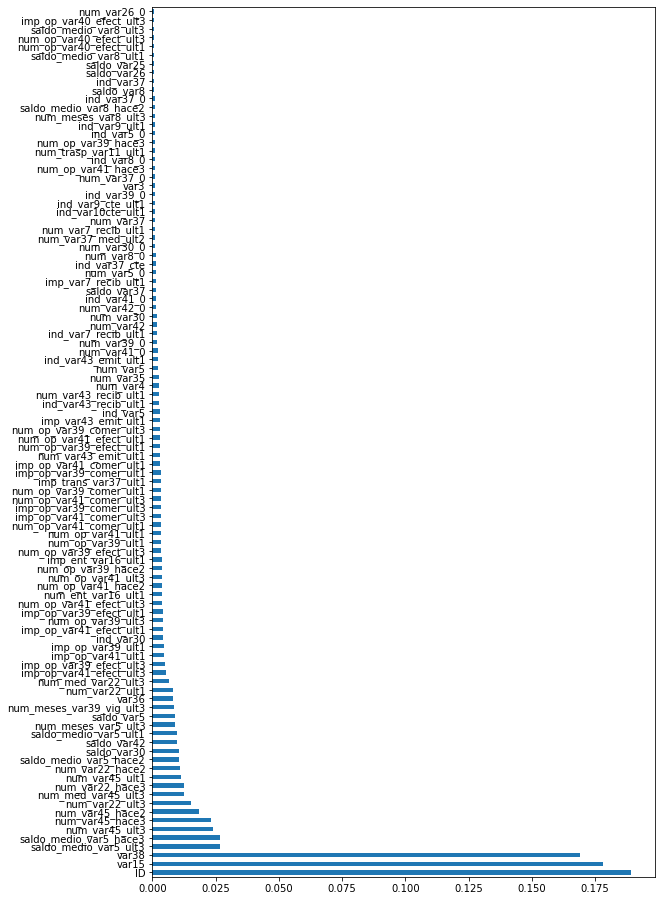

In [58]:
import matplotlib.pyplot as plt
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

plt.figure(figsize = (9,16))

ranked_features.nlargest(100).plot(kind="barh")